# Linear Harmonic Oscillator

## 1D

### Ground state for different frequencies

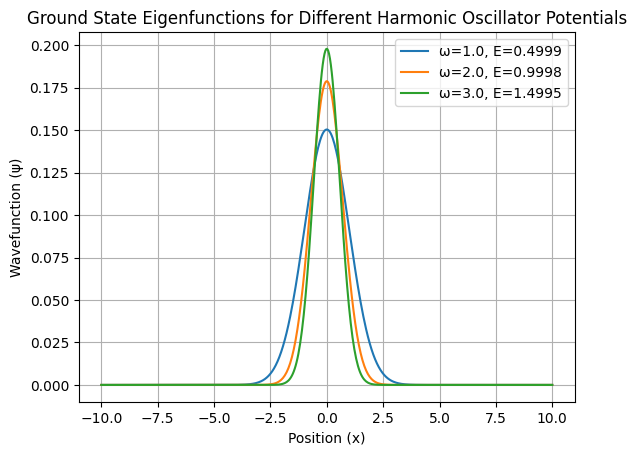

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants
hbar = 1.0
mass = 1.0
L = 10.0  # Length of the 1D domain
N = 500  # Number of grid points
x = np.linspace(-L, L, N)  # Define the x-axis

# Create different potential energy functions (V(x))
def potential(x):
    return 0.5 * mass * (omega**2) * x**2  # Harmonic oscillator potential

omega_values = [1.0, 2.0, 3.0]  # Different angular frequencies for different potentials

# Initialize arrays to store eigenvalues and eigenfunctions
eigenvalues = []
eigenfunctions = []

# Solve the Schrödinger equation for each potential
for omega in omega_values:
    V = potential(x)
    dx = x[1] - x[0]
    T = (-hbar**2 / (2 * mass)) * (np.diag(-2.0 / dx**2 * np.ones(N)) + np.diag(1.0 / dx**2 * np.ones(N - 1), 1) + np.diag(1.0 / dx**2 * np.ones(N - 1), -1))
    H = T + np.diag(V * np.ones(N))
    eigvals, eigvecs = eigh(H)
    eigenvalues.append(eigvals)
    eigenfunctions.append(eigvecs[:, 0])  # Get the ground state eigenfunction

# Plot the ground state eigenfunctions for different potentials
for i, omega in enumerate(omega_values):
    plt.plot(x, eigenfunctions[i], label=f'ω={omega}, E={eigenvalues[i][0]:.4f}')

plt.xlabel('Position (x)')
plt.ylabel('Wavefunction (ψ)')
plt.title('Ground State Eigenfunctions for Different Harmonic Oscillator Potentials')
plt.legend()
plt.grid()
plt.show()


### Different energy states

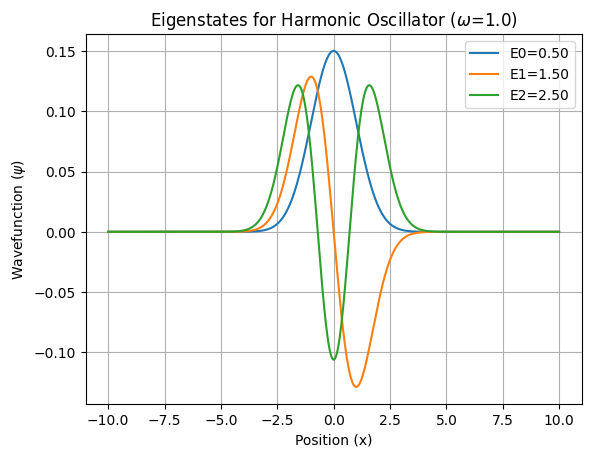

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants
hbar = 1.0
mass = 1.0
L = 10.0  # Length of the 1D domain
N = 500  # Number of grid points
x = np.linspace(-L, L, N)  # Define the x-axis

# Create the potential energy function (V(x)) for a harmonic oscillator
def potential(x, omega):
    return 0.5 * mass * (omega**2) * x**2

# Set the angular frequency for the harmonic oscillator
omega = 1.0

# Initialize arrays to store eigenvalues and eigenfunctions
eigenvalues = []
eigenfunctions = []

# Solve the Schrödinger equation for the harmonic oscillator
V = potential(x, omega)
dx = x[1] - x[0]
T = (-hbar**2 / (2 * mass)) * (np.diag(-2.0 / dx**2 * np.ones(N)) + 
                    np.diag(1.0 / dx**2 * np.ones(N - 1), 1) + 
                    np.diag(1.0 / dx**2 * np.ones(N - 1), -1))
H = T + np.diag(V * np.ones(N))
eigvals, eigvecs = eigh(H)

# Number of eigenstates to plot
num_states_to_plot = 3  # Adjust this number as needed

# Plot the selected eigenstates (ground state and excited states)
for i in range(num_states_to_plot):
    eigenfunction = eigvecs[:, i]
    eigenvalue = eigvals[i]
    plt.plot(x, eigenfunction, label=f'E{ i }={eigenvalue:.2f}')

plt.xlabel('Position (x)')
plt.ylabel('Wavefunction ($\psi$)')
plt.title(f'Eigenstates for Harmonic Oscillator ($\omega$={omega})')
plt.legend()
plt.grid()
plt.show()


## 2D

Contour plots

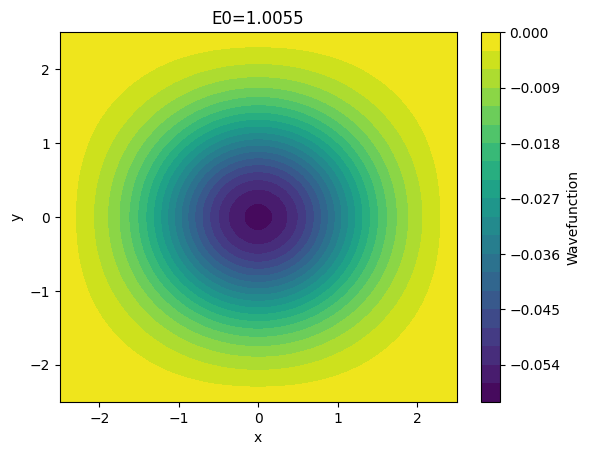

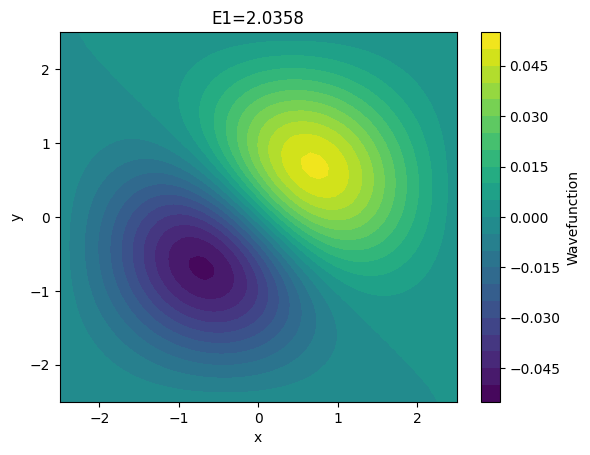

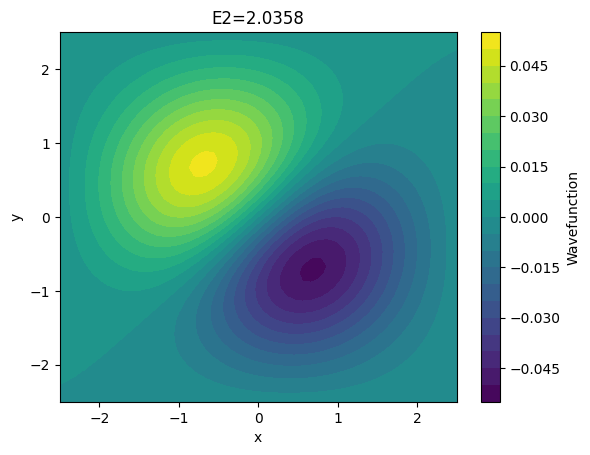

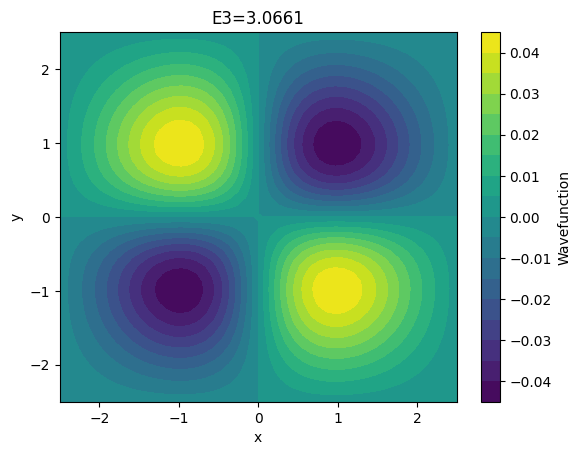

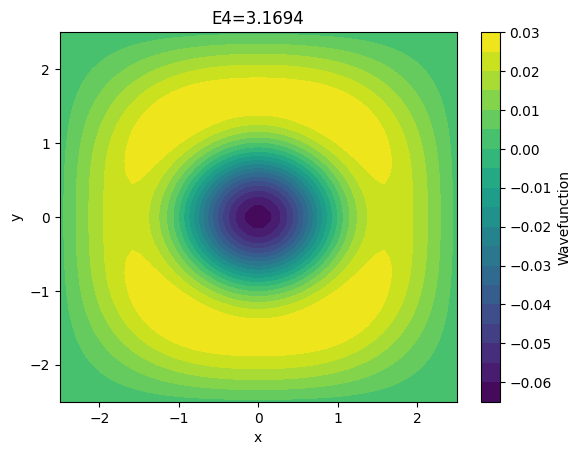

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants
hbar = 1.0
mass = 1.0
L = 5.0  # Reduced domain size for faster computation
N = 50  # Reduced number of grid points
x = np.linspace(-L/2, L/2, N)  # Define the x-axis
y = np.linspace(-L/2, L/2, N)  # Define the y-axis
X, Y = np.meshgrid(x, y)

# Create the potential energy function (V(x, y)) for a 2D harmonic oscillator
def potential(x, y, omega_x, omega_y):
    return 0.5 * mass * (omega_x**2 * x**2 + omega_y**2 * y**2)

omega_x = 1.0  # Angular frequency in the x-direction
omega_y = 1.0  # Angular frequency in the y-direction

# Initialize arrays to store eigenvalues and eigenfunctions
eigenvalues = []
eigenfunctions = []

# Solve the Schrödinger equation for the 2D harmonic oscillator
V = potential(X, Y, omega_x, omega_y)
dx = x[1] - x[0]
dy = y[1] - y[0]
T_x = (-hbar**2 / (2 * mass)) * (np.diag(-2.0 / dx**2 * np.ones(N)) + np.diag(1.0 / dx**2 * np.ones(N - 1), 1) + np.diag(1.0 / dx**2 * np.ones(N - 1), -1))
T_y = (-hbar**2 / (2 * mass)) * (np.diag(-2.0 / dy**2 * np.ones(N)) + np.diag(1.0 / dy**2 * np.ones(N - 1), 1) + np.diag(1.0 / dy**2 * np.ones(N - 1), -1))

# Construct the 2D kinetic energy operator
T = np.kron(T_x, np.eye(N)) + np.kron(np.eye(N), T_y)

H = T + np.diag(V.flatten())  # Flatten V to match the shape of T
eigvals, eigvecs = eigh(H)

# Number of eigenstates to plot
num_states_to_display = 5  # Adjust this number as needed

# Plot the selected eigenstates (ground state and excited states)
for i in range(num_states_to_display):
    eigenfunction = eigvecs[:, i].reshape(N, N)
    eigenvalue = eigvals[i]
    plt.contourf(X, Y, eigenfunction, levels=20, cmap='viridis')
    plt.colorbar(label='Wavefunction')
    plt.title(f'E{ i }={eigenvalue:.4f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


Surface plots

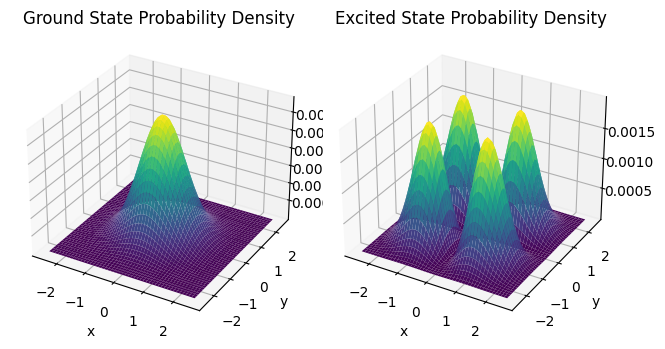

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from mpl_toolkits.mplot3d import Axes3D

# Constants
hbar = 1.0
mass = 1.0
L = 5.0  # Reduced domain size for faster computation
N = 50  # Reduced number of grid points
x = np.linspace(-L/2, L/2, N)  # Define the x-axis
y = np.linspace(-L/2, L/2, N)  # Define the y-axis
X, Y = np.meshgrid(x, y)

# Create the potential energy function (V(x, y)) for a 2D harmonic oscillator
def potential(x, y, omega_x, omega_y):
    return 0.5 * mass * (omega_x**2 * x**2 + omega_y**2 * y**2)

omega_x = 1.0  # Angular frequency in the x-direction
omega_y = 1.0  # Angular frequency in the y-direction

# Initialize arrays to store eigenvalues and eigenfunctions
eigenvalues = []
eigenfunctions = []

# Solve the Schrödinger equation for the 2D harmonic oscillator
V = potential(X, Y, omega_x, omega_y)
dx = x[1] - x[0]
dy = y[1] - y[0]
T_x = (-hbar**2 / (2 * mass)) * (np.diag(-2.0 / dx**2 * np.ones(N)) + np.diag(1.0 / dx**2 * np.ones(N - 1), 1) + np.diag(1.0 / dx**2 * np.ones(N - 1), -1))
T_y = (-hbar**2 / (2 * mass)) * (np.diag(-2.0 / dy**2 * np.ones(N)) + np.diag(1.0 / dy**2 * np.ones(N - 1), 1) + np.diag(1.0 / dy**2 * np.ones(N - 1), -1))

# Construct the 2D kinetic energy operator
T = np.kron(T_x, np.eye(N)) + np.kron(np.eye(N), T_y)

H = T + np.diag(V.flatten())  # Flatten V to match the shape of T
eigvals, eigvecs = eigh(H)

# Extract the ground state and an excited state
ground_state = eigvecs[:, 0].reshape(N, N)
excited_state = eigvecs[:, 3].reshape(N, N)  # INPUT n for nth state

# Calculate the probability density for each state (normalize)
ground_state_prob_density = np.abs(ground_state)**2 / np.sum(np.abs(ground_state)**2)
excited_state_prob_density = np.abs(excited_state)**2 / np.sum(np.abs(excited_state)**2)

# Create 3D surface plots for the probability density
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

X, Y = np.meshgrid(x, y)

ax1.plot_surface(X, Y, ground_state_prob_density, cmap='viridis')
ax1.set_title('Ground State Probability Density')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot_surface(X, Y, excited_state_prob_density, cmap='viridis')
ax2.set_title('Excited State Probability Density')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()


## 3D

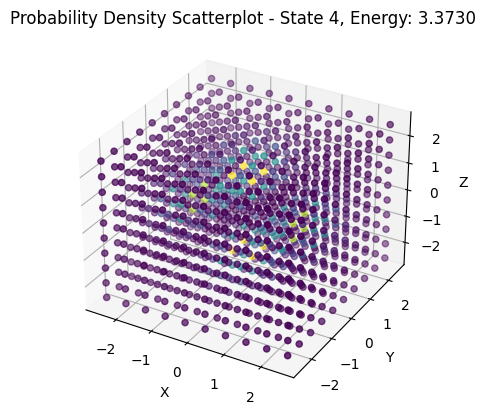

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants
hbar = 1.0
mass = 1.0
L = 5.0  # Domain size
N = 10  # Number of grid points
x = np.linspace(-L/2, L/2, N)  # Define the x-axis
y = np.linspace(-L/2, L/2, N)  # Define the y-axis
z = np.linspace(-L/2, L/2, N)  # Define the z-axis
X, Y, Z = np.meshgrid(x, y, z)

# Create the potential energy function (V(x, y, z)) for a 3D harmonic oscillator
def potential(x, y, z, omega_x, omega_y, omega_z):
    return 0.5 * mass * (omega_x**2 * x**2 + omega_y**2 * y**2 + omega_z**2 * z**2)

omega_x = 1.0  # Angular frequency in the x-direction
omega_y = 1.0  # Angular frequency in the y-direction
omega_z = 1.0  # Angular frequency in the z-direction

# Initialize arrays to store eigenvalues and eigenfunctions
eigenvalues = []
eigenfunctions = []

# Solve the Schrödinger equation for the 3D harmonic oscillator
V = potential(X, Y, Z, omega_x, omega_y, omega_z)
dx = x[1] - x[0]
dy = y[1] - y[0]
dz = z[1] - z[0]

T_x = (-hbar**2 / (2 * mass)) * (np.diag(-2.0 / dx**2 * np.ones(N)) + np.diag(1.0 / dx**2 * np.ones(N - 1), 1) + np.diag(1.0 / dx**2 * np.ones(N - 1), -1))
T_y = (-hbar**2 / (2 * mass)) * (np.diag(-2.0 / dy**2 * np.ones(N)) + np.diag(1.0 / dy**2 * np.ones(N - 1), 1) + np.diag(1.0 / dy**2 * np.ones(N - 1), -1))
T_z = (-hbar**2 / (2 * mass)) * (np.diag(-2.0 / dz**2 * np.ones(N)) + np.diag(1.0 / dz**2 * np.ones(N - 1), 1) + np.diag(1.0 / dz**2 * np.ones(N - 1), -1))

# Construct the 3D kinetic energy operator
T = np.kron(np.kron(np.eye(N), T_x), np.eye(N)) + np.kron(np.kron(np.eye(N), np.eye(N)), T_y) + np.kron(np.kron(T_z, np.eye(N)), np.eye(N))

H = T + np.diag(V.flatten())  # Flatten V to match the shape of T
eigvals, eigvecs = eigh(H)

# Extract an arbitrary excited state (e.g., index 2)
excited_state_index = 4
excited_state = eigvecs[:, excited_state_index].reshape(N, N, N)

# Calculate the energy eigenvalue
energy_eigenvalue = eigvals[excited_state_index]

# Calculate the probability density for the excited state
probability_density = np.real(excited_state.conjugate() * excited_state)

# Create a 3D scatterplot for the probability density
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=probability_density, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Probability Density Scatterplot - State {excited_state_index}, Energy: {energy_eigenvalue:.4f}')

plt.show()


# Hydrogen Atom

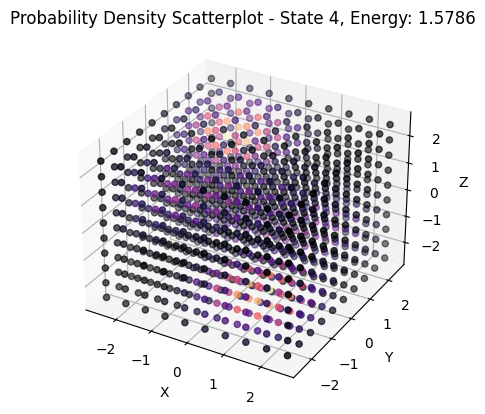

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants
hbar = 1.0
mass = 1.0
L = 5.0  # Domain size
N = 10  # Number of grid points
x = np.linspace(-L/2, L/2, N)  # Define the x-axis
y = np.linspace(-L/2, L/2, N)  # Define the y-axis
z = np.linspace(-L/2, L/2, N)  # Define the z-axis
X, Y, Z = np.meshgrid(x, y, z)

# Create the potential energy function (V(x, y, z)) for a 3D harmonic oscillator
def potential(x, y, z):
    return 1/(x**2+y**2+z**2)**0.5


# Initialize arrays to store eigenvalues and eigenfunctions
eigenvalues = []
eigenfunctions = []

# Solve the Schrödinger equation for the 3D harmonic oscillator
V = potential(X, Y, Z)
dx = x[1] - x[0]
dy = y[1] - y[0]
dz = z[1] - z[0]

T_x = (-hbar**2 / (2 * mass)) * (np.diag(-2.0 / dx**2 * np.ones(N)) + np.diag(1.0 / dx**2 * np.ones(N - 1), 1) + np.diag(1.0 / dx**2 * np.ones(N - 1), -1))
T_y = (-hbar**2 / (2 * mass)) * (np.diag(-2.0 / dy**2 * np.ones(N)) + np.diag(1.0 / dy**2 * np.ones(N - 1), 1) + np.diag(1.0 / dy**2 * np.ones(N - 1), -1))
T_z = (-hbar**2 / (2 * mass)) * (np.diag(-2.0 / dz**2 * np.ones(N)) + np.diag(1.0 / dz**2 * np.ones(N - 1), 1) + np.diag(1.0 / dz**2 * np.ones(N - 1), -1))

# Construct the 3D kinetic energy operator
T = np.kron(np.kron(np.eye(N), T_x), np.eye(N)) + np.kron(np.kron(np.eye(N), np.eye(N)), T_y) + np.kron(np.kron(T_z, np.eye(N)), np.eye(N))

H = T + np.diag(V.flatten())  # Flatten V to match the shape of T
eigvals, eigvecs = eigh(H)

# Extract an arbitrary excited state (e.g., index 2)
excited_state_index = 4
excited_state = eigvecs[:, excited_state_index].reshape(N, N, N)

# Calculate the energy eigenvalue
energy_eigenvalue = eigvals[excited_state_index]

# Calculate the probability density for the excited state
probability_density = np.real(excited_state.conjugate() * excited_state)

# Create a 3D scatterplot for the probability density
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=probability_density, cmap='magma')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Probability Density Scatterplot - State {excited_state_index}, Energy: {energy_eigenvalue:.4f}')

plt.show()


'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'